----------------------------------------------------------------------------------------------------------------------

**Name:** Qingyue(Sue) Su

**E-mail:** qingyuesu@brandeis.edu

**Date:** 2019-12-05

<h1 align="center"><font size="5"> Instacart Customer Behavior Analysis and Recommender Design</font></h1>

<img src="assets/logo.png" width="20%">

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a id="#Part0">Import packages and data</a></li>
        <li><a id="#Part1">Part 1. Explore the data frame and data relationship</a></li>
            <ul>
                <li><a id="#Part1_1">1. Explore the data frame of each table</a></li>
                <li><a id="#Part1_2">2. Draw an E-R diagram</a></li>
            </ul>
        <li><a id="#Part2">Part 2. Explanatory data analysis (EDA) of customer data</a></li>   
            <ul>
                <li><a id="#Part2_1">1. How many orders the dataset has? How to divide the train and test orders?</a></li>
                <li><a id="#Part2_2">2. How many unique users we have? How to divide the train and test users?</a></li>
                <li><a id="#Part2_3">3. How many orders each user created? What's the most common total number of orders one user created?</a></li>
                <li><a id="#Part2_4">4. What day of week do the users purchase?</a></li>
                <li><a id="#Part2_5">5. What time of day do the users purchase?</a></li>
                <li><a id="#Part2_6">6. How often do the users purchase?</a></li>
                <li><a id="#Part2_7">7. How many products do people purchase in an order? What's the most common total number of products in one order?</a></li>
                <li><a id="#Part2_8">8. How many transaction and unique products is in this dataset?</a></li>
                <li><a id="#Part2_9">9. How the products distribute in different department?</a></li>
                <li><a id="#Part2_10">10. What are the product that people purchase the most?</a></li>
                <li><a id="#Part2_11">11. What are the aisles where people purchase the most?</a></li>
                <li><a id="#Part2_12">12. What are the departments where people purchase the most?</a></li>
            </ul>
        <li><a id="#Part3">Part 3. Recommender design and model evaluation</a></li>
            <ul>
                <li><a id="#Part3_1">1. Recommender design</a></li>
                    <ul>
                        <li><a id="#Part3_1_1">(1) Data Preprocessing</a></li>
                        <li><a id="#Part3_1_2">(2) Recommender Model (Function)</a></li>
                    </ul>
                <li><a id="#Part3_2">2. Model evaluation</a></li>
                    <ul>
                        <li><a id="#Part3_2_1">(1) Basic exploration of the model</a></li>
                        <li><a id="#Part3_2_2">(2) Define a metric for model evaluation</a></li>
                        <li><a id="#Part3_2_3">(3) Model evaluation function</a></li>
                    </ul>
            </ul>
    </ul>
</div>
<br>
<hr>

Import required packages:

In [1]:
#!pip install squarify
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from  matplotlib import cm
import matplotlib as mpl
import numpy as np
import squarify
from sklearn.metrics.pairwise import cosine_similarity
#% matplotlib inline
plt.style.use('ggplot')

Import data:

In [2]:
path = os.path.join(os.getcwd(),"data")
table_name = []
table_dic = {}

for file in os.listdir(path):  
    filename = file.split('.')[0]
    table_name.append(filename)
    table_dic[filename] = pd.read_csv(os.path.join(path, file))

print(table_name)
print(table_dic.keys())

['products', 'orders', 'order_products__train', 'departments', 'aisles', 'order_products__prior']
dict_keys(['products', 'orders', 'order_products__train', 'departments', 'aisles', 'order_products__prior'])


In [3]:
Products = table_dic['products']
Orders = table_dic['orders']
Departments = table_dic['departments']
Aisles = table_dic['aisles']
Order_products_train = table_dic['order_products__train']
Order_products_prior = table_dic['order_products__prior']

<h2 id="#Part1">Part 1. Explore the data frame and data relationship</h2>
<hr>

<h3 id="#Part1_1">1. Explore the data frame of each table</h3>

#### (1) Products

49K+ rows
* **product_id:** product identifier (Primary Key)
* **product_name:** name of the product
* **aisle_id:** aisle identifier (Foreign Key)
* **department_id:** department identifier (Foreign Key)

In [4]:
Products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# Explore the primary key of this table

print(len(Products))
p = set(Products["product_id"])
print(len(p))

49688
49688


#### (2) Orders

3M+ rows
* **order_id:** order identifier (Primary Key)
* **user_id:** user/customer identifier (Foreign Key)
* **eval_set:** which evaluation set this order belongs in (see SET described below)
* **order_number:** the order sequence number for this user (1 = first, n = nth)
* **order_dow:** the day of the week the order was placed on
* **order_hour_of_day:** the hour of the day the order was placed on
* **days_since_prior:** days since the last order, capped at 30 (with NAs for order_number = 1)

In [6]:
Orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
# Explore the primary key of this table

print(len(Orders))
p = set(Orders["order_id"])
print(len(p))

3421083
3421083


#### (3) Departments

21 rows
* **department_id:** department identifier (Primary Key)
* **department:** the name of the department

In [8]:
Departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
# Explore the primary key of this table

print(len(Departments))
p = set(Departments["department_id"])
print(len(p))

21
21


#### (4) Aisles

134 rows
* **aisle_id:** aisle identifier
* **aisle:** the name of the aisle

In [10]:
Aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [11]:
# Explore the primary key of this table

print(len(Aisles))
p = set(Aisles["aisle_id"])
print(len(p))

134
134


#### (5) Order_products_train

1M+ rows
* **order_id:** Order identifier (Primary Key 1, Foreign Key 1)
* **product_id:** Product identifier (Primary Key 1, Foreign Key 1)
* **add_to_cart_order:** Order in which each product was added to cart
* **reordered:** 1 if this product has been ordered by this user in the past, 0 otherwise

In [12]:
Order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [13]:
# Explore the primary key of this table

print(len(Order_products_train))
p = Order_products_train[["order_id","product_id"]]
p_new = p.drop_duplicates()
print(len(p_new))

1384617
1384617


#### (6) Order_products_prior

32M+ rows
* **order_id:** Order identifier (Primary Key 1, Foreign Key 1)
* **product_id:** Product identifier (Primary Key 1, Foreign Key 1)
* **add_to_cart_order:** Order in which each product was added to cart
* **reordered:** 1 if this product has been ordered by this user in the past, 0 otherwise

In [14]:
Order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [15]:
# Explore the primary key of this table

print(len(Order_products_prior))
p = Order_products_prior[["order_id","product_id"]]
p_new = p.drop_duplicates()
print(len(p_new))

32434489
32434489


<h3 id="#Part1_2">2. Draw an E-R diagram</h3>

<img src="assets/ER_Diagram.png" width="90%">

<h2 id="#Part2">Part 2. Explanatory data analysis (EDA) of customer data</h2>
<hr>

* How many orders the dataset has? How to divide the train and test orders?
* How many unique users we have? How to divide the train and test users?
* How many orders each user created? What's the most common total number of orders one user created?
* What day of week do the users purchase?
* What time of day do the users purchase?
* How often do the users purchase?
* How many products do people purchase in an order? What's the most common total number of products in one order?
* How many transaction and unique products is in this dataset?
* How the products distribute in different department?
* What are the product that people purchase the most?
* What are the aisles where people purchase the most?
* What are the departments where people purchase the most?

<h3 id="#Part2_1">1. How many orders the dataset has? How to divide the train and test orders?</h3>

**order_id**: order identifier

In [16]:
p = set(Orders["order_id"]) 
print(len(p))

3421083


**eval_set**: which evaluation set this order belongs in (see SET described below)

In [17]:
p = set(Orders["eval_set"])
print(p)

{'test', 'prior', 'train'}


* **prior**: orders prior to that users most recent order (~3.2m orders)
* **train**: training data supplied to participants (~131k orders)
* **test**: test data reserved for machine learning competitions (~75k orders)

In [18]:
Orders.groupby(["eval_set"])[['order_id']].nunique()
# Orders['order_id'].groupby(Orders["eval_set"]).count()

,order_id
eval_set,
prior,3214874
test,75000
train,131209


**Outcome:**
* there are 3,421,083 orders in total.
* there are 3,214,874 orders that are prior.
* there are 131,209 orders that are in train set.
* there are 75,000 orders that are in test set.

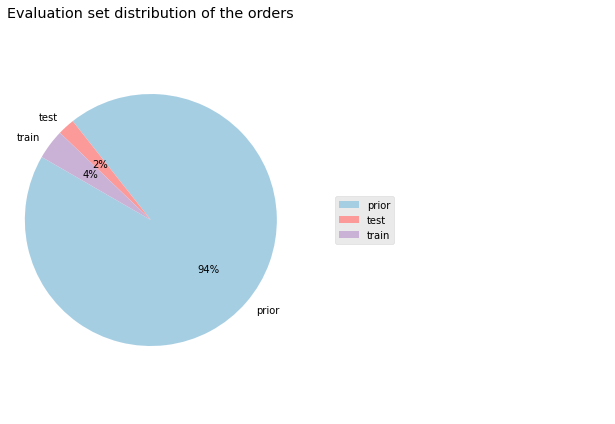

In [19]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['prior', 'test', 'train']
sizes = [3214874, 75000, 131209]
explode = (0, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, axes = plt.subplots(figsize=(9,6),ncols=2) # Set the graph location and size
ax1, ax2 = axes.ravel()

colors = cm.Paired(np.arange(len(sizes))/len(sizes)) # colormaps: Paired, autumn, rainbow, gray,spring,Darks
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=150, colors=colors)

ax1.axis('equal')  

# Set the size of characters
proptease = fm.FontProperties()
proptease.set_size('medium')
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

ax1.set_title('Evaluation set distribution of the orders', loc='center')

# ax2 only shows the legend
ax2.axis('off')
ax2.legend(patches, labels, loc='center left')

plt.tight_layout()
#plt.savefig('Demo_project_set_legend_good.jpg')
plt.show()

<h3 id="#Part2_2">2. How many unique users we have? How to divide the train and test users?</h3>

**user_id**: customer identifier

In [20]:
p = set(Orders["user_id"]) 
print(len(p))

206209


In [21]:
Orders.groupby(["eval_set"])[['user_id']].nunique()
#Orders['order_id'].groupby(Orders["eval_set"]).count()

,user_id
eval_set,
prior,206209
test,75000
train,131209


**Outcome:**
* there are 206209 unique customer in total.
* there are 131209 customers in the train set.
* there are 75000 customers in the test set.

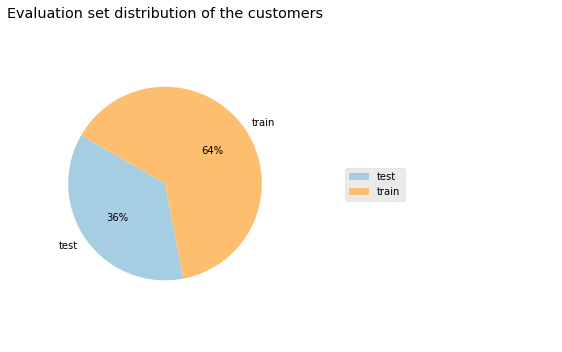

In [22]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['test', 'train']
sizes = [75000, 131209]
explode = (0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, axes = plt.subplots(figsize=(8,5),ncols=2) # Set the graph location and size
ax1, ax2 = axes.ravel()

colors = cm.Paired(np.arange(len(sizes))/len(sizes)) # colormaps: Paired, autumn, rainbow, gray,spring,Darks
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=150, colors=colors)

ax1.axis('equal')  

# Set the size of characters
proptease = fm.FontProperties()
proptease.set_size('medium')
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

ax1.set_title('Evaluation set distribution of the customers', loc='center')

# ax2 only shows the legend
ax2.axis('off')
ax2.legend(patches, labels, loc='center left')

plt.tight_layout()
#plt.savefig('Demo_project_set_legend_good.jpg')
plt.show()

<h3 id="#Part2_3">3. How many orders each user created? What's the most common total number of orders one user created?</h3>

In [23]:
# Step1: Calculate the total amount of orders per user

order_per_user = Orders.groupby(["user_id"])[['order_number']].nunique()

order_per_user_new = pd.DataFrame(order_per_user) # transfer to the dataframe
order_per_user_new.reset_index(inplace=True)

# Step2: Calculate the total users buying the same total orders

total_order_user = order_per_user_new.groupby(["order_number"])[['user_id']].nunique()

total_order_user_new = pd.DataFrame(total_order_user) # transfer to the dataframe
total_order_user_new.reset_index(inplace=True)

# Step3: Sort the values

total_order_user_new2 = total_order_user_new.sort_values(by=['order_number'],ascending=True,na_position='first')
total_order_user_new2.head()

,order_number,user_id
0,4,23986
1,5,19590
2,6,16165
3,7,13850
4,8,11700


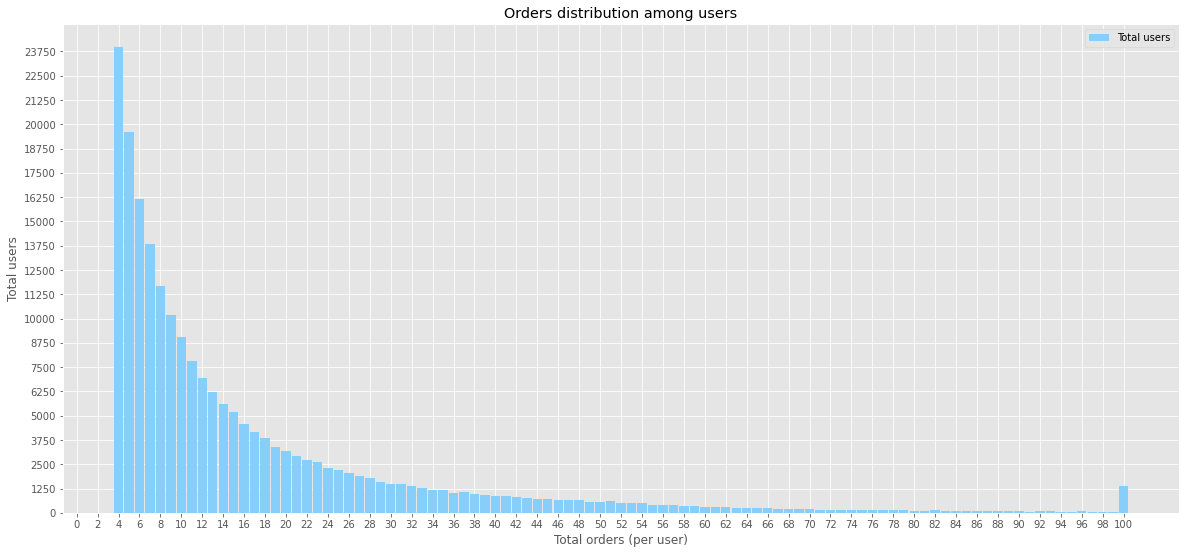

In [24]:
plt.figure(figsize=(20, 9))
plt.subplot(1, 1, 1)

#N = 97
values = total_order_user_new2["user_id"]
index = total_order_user_new2["order_number"]

width = 0.9

p2 = plt.bar(index, values, width, label="Total users", color="#87CEFA")

plt.xlabel('Total orders (per user)')
plt.ylabel('Total users')

plt.title('Orders distribution among users')

plt.xticks(np.arange(0, 102, 2))
plt.yticks(np.arange(0, 25000, 1250))

plt.legend(loc="upper right")
plt.show()

**Outcome:**

* The amount of orders for each customers are between 4 to 100. 
* Majority of people had purchased 4 to 10 times.

<h3 id="#Part2_4">4. What day of week do the users purchase?</h3>

**order_dow**: the day of the week the order was placed on

In [25]:
p = set(Orders["order_dow"])
print(p)

{0, 1, 2, 3, 4, 5, 6}


In [26]:
order_per_weekday = Orders.groupby(["order_dow"])[['order_id']].nunique()
order_per_weekday

order_per_weekday_new = pd.DataFrame(order_per_weekday) # transfer to the dataframe
order_per_weekday_new.reset_index(inplace=True)
order_per_weekday_new

,order_dow,order_id
0,0,600905
1,1,587478
2,2,467260
3,3,436972
4,4,426339
5,5,453368
6,6,448761


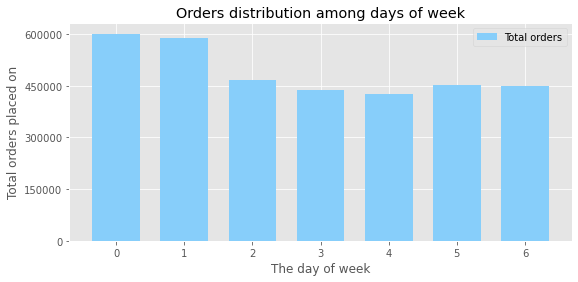

In [27]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 1, 1)

#N = 7
values = order_per_weekday_new["order_id"]
index = order_per_weekday_new["order_dow"]

width = 0.7

p2 = plt.bar(index, values, width, label="Total orders", color="#87CEFA")

plt.xlabel('The day of week')
plt.ylabel('Total orders placed on')

plt.title('Orders distribution among days of week')

plt.xticks(np.arange(0, 7, 1))
plt.yticks(np.arange(0, 740000, 150000))

plt.legend(loc="upper right")

plt.show()

**Outcome:**

* 0 (Sun) and 1 (Mon) has the most orders in a week
* 4 (Thur) has the least orders.

<h3 id="#Part2_5">5. What time of day do the users purchase?</h3>

**order_hour_of_day**: the hour of the day the order was placed on

In [28]:
p = set(Orders["order_hour_of_day"])
print(p)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


In [29]:
# What time of day do people purchase?

Order_per_hour_of_day = Orders.groupby(["order_hour_of_day"])[['order_id']].nunique()
Order_per_hour_of_day


Order_per_hour_of_day_new = pd.DataFrame(Order_per_hour_of_day) # transfer to the dataframe
Order_per_hour_of_day_new.reset_index(inplace=True)
Order_per_hour_of_day_new.head()

,order_hour_of_day,order_id
0,0,22758
1,1,12398
2,2,7539
3,3,5474
4,4,5527


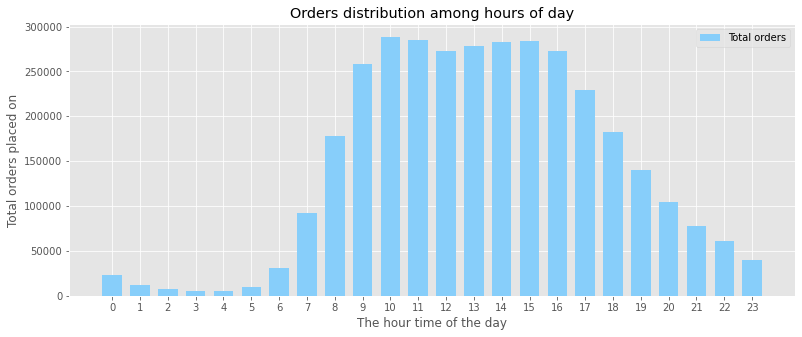

In [30]:
plt.figure(figsize=(13, 5))

plt.subplot(1, 1, 1)

#N = 7
values = Order_per_hour_of_day_new["order_id"]
index = Order_per_hour_of_day_new["order_hour_of_day"]

width = 0.7

p2 = plt.bar(index, values, width, label="Total orders", color="#87CEFA")

plt.xlabel('The hour time of the day')
plt.ylabel('Total orders placed on')

plt.title('Orders distribution among hours of day')

plt.xticks(np.arange(0, 24, 1))
#plt.yticks(np.arange(0, 740000, 150000))

plt.legend(loc="upper right")

plt.show()

**Outcome:**

* Looks like people like to order between 8am to 6pm.

<h3 id="#Part2_6">6. How often do the users purchase?</h3>

**days_since_prior_order**: days since the last order, capped at 30 (with NAs for order_number = 1)

In [31]:
# transfer the type
prior_order_new = Orders[["days_since_prior_order","order_id"]].dropna() # need to drop NA
prior_order_new["days_since_prior_order"]=prior_order_new["days_since_prior_order"].astype(int) # day => integer
#prior_order_new.head()

# group the data
Order_per_days_since_prior = prior_order_new.groupby(["days_since_prior_order"])[['order_id']].nunique()

Order_per_days_since_prior_new = pd.DataFrame(Order_per_days_since_prior) # transfer to the dataframe
Order_per_days_since_prior_new.reset_index(inplace=True)
Order_per_days_since_prior_new.head()

,days_since_prior_order,order_id
0,0,67755
1,1,145247
2,2,193206
3,3,217005
4,4,221696


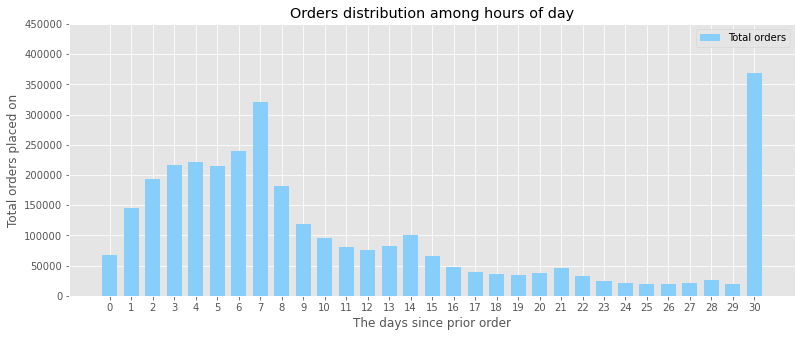

In [32]:
plt.figure(figsize=(13, 5))

plt.subplot(1, 1, 1)

#N = 7
values = Order_per_days_since_prior_new["order_id"]
index = Order_per_days_since_prior_new["days_since_prior_order"]

width = 0.7

p2 = plt.bar(index, values, width, label="Total orders", color="#87CEFA")

plt.xlabel('The days since prior order')
plt.ylabel('Total orders placed on')

plt.title('Orders distribution among hours of day')

plt.xticks(np.arange(0, 31, 1))
plt.yticks(np.arange(0, 480000, 50000))

plt.legend(loc="upper right")

plt.show()

**Outcome:**

* Looks like majority people order once a week, between 0 to 7.
* And there are people who order once more than 30 days.

<h3 id="#Part2_7">7. How many products do people purchase in an order? What's the most common total number of products in one order?</h3>

In [33]:
# Concatenation of both tables.
Order_products = pd.concat([Order_products_prior, Order_products_train]) 
Order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


<img src="assets/Concat_1.png" width="90%">

In [34]:
Products_per_order = Order_products.groupby(["order_id"])[['product_id']].nunique()
#Products_per_order.head()
Products_per_order_new = pd.DataFrame(Products_per_order) # transfer to the dataframe
Products_per_order_new.reset_index(inplace=True)
#Products_per_order_new.head()

#Products_per_order_new
Sum_order_per_sum_products = Products_per_order_new.groupby(["product_id"])[['order_id']].nunique()
#Products_per_order.head()
Sum_order_per_sum_products_new = pd.DataFrame(Sum_order_per_sum_products) # transfer to the dataframe
Sum_order_per_sum_products_new.reset_index(inplace=True)
Sum_order_per_sum_products_new.head()

,product_id,order_id
0,1,163593
1,2,194361
2,3,215060
3,4,230299
4,5,237225


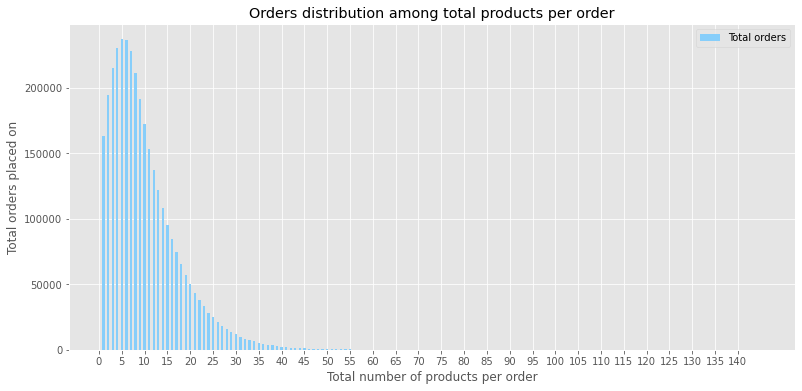

In [35]:
plt.figure(figsize=(13, 6))

plt.subplot(1, 1, 1)

#N = 7
values = Sum_order_per_sum_products_new["order_id"]
index = Sum_order_per_sum_products_new["product_id"]

width = 0.5

p2 = plt.bar(index, values, width, label="Total orders", color="#87CEFA")

plt.xlabel('Total number of products per order')
plt.ylabel('Total orders placed on')

plt.title('Orders distribution among total products per order')

plt.xticks(np.arange(0, 141, 5))
#plt.yticks(np.arange(0, 480000, 50000))

plt.legend(loc="upper right")

plt.show()

**Outcome:**

* People mostly purchase 4 items per order.
* Majority of people like to purchase between 3 to 8 items per order.

<h3 id="#Part2_8">8. How many transaction and unique products is in this dataset?</h3>

In [36]:
print(Order_products.shape[0])
print(len(Order_products.order_id.unique()))
print(len(Order_products.product_id.unique()))

33819106
3346083
49685


<h3 id="#Part2_9">9. How the products distribute in different department?</h3>

In [37]:
# Merging tables together.

# Step 1
Products_Departments = pd.merge(Products, Departments, how='left', on=['department_id', 'department_id'])
Products_Departments.head()

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,2,All-Seasons Salt,104,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,Green Chile Anytime Sauce,5,13,pantry


<img src="assets/Leftjoin_1.png" width="30%">

In [38]:
# Step 2
Products_Departments_Aisles = pd.merge(Products_Departments, Aisles, how='left', on=['aisle_id', 'aisle_id'])
Products_Departments_Aisles.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


<img src="assets/Leftjoin_2.png" width="30%">

In [39]:
Sum_product_per_department = Products_Departments_Aisles.groupby(["department"])[['product_id']].nunique()
#Products_per_order.head()
Sum_product_per_department_new = pd.DataFrame(Sum_product_per_department) # transfer to the dataframe
Sum_product_per_department_new.reset_index(inplace=True)
Sum_product_per_department_new_2= Sum_product_per_department_new.sort_values(by='product_id', ascending=False)
Sum_product_per_department_new_2.head()

,department,product_id
17,personal care,6563
20,snacks,6264
16,pantry,5371
3,beverages,4365
10,frozen,4007


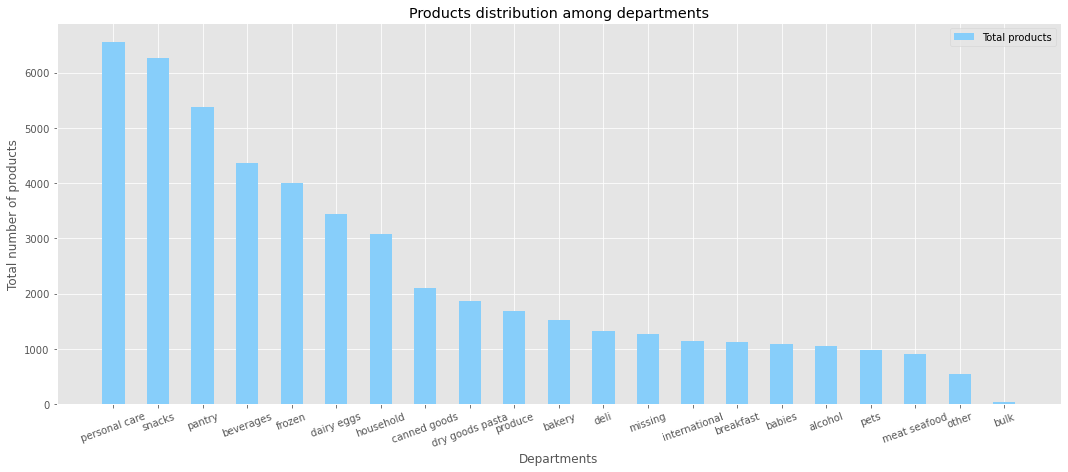

In [40]:
plt.figure(figsize=(18, 7))

plt.subplot(1, 1, 1)

#N = 7
values = Sum_product_per_department_new_2["product_id"]

index = Sum_product_per_department_new_2["department"]

width = 0.5

p2 = plt.bar(index, values, width, label="Total products", color="#87CEFA")

plt.xlabel('Departments')
plt.ylabel('Total number of products')

plt.title('Products distribution among departments')

plt.xticks(rotation=20)
#plt.yticks(np.arange(0, 480000, 50000))

plt.legend(loc="upper right")

plt.show()

<h3 id="#Part2_10">10. What are the product that people purchase the most?</h3>

In [41]:
# Merging Products_Departments_Aisles and Order_products.

Order_Products_Departments_Aisles = pd.merge(Order_products, Products_Departments_Aisles, how='left', on=['product_id', 'product_id'])
Order_Products_Departments_Aisles.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients


<img src="assets/Leftjoin_3.png" width="30%">

In [42]:
# Find out the top 15 products people purchased the most.

Sum_order_per_product_name = Order_Products_Departments_Aisles.groupby(["product_name"])[['order_id']].count()

Sum_order_per_product_name_new = pd.DataFrame(Sum_order_per_product_name) # transfer to the dataframe
Sum_order_per_product_name_new.reset_index(inplace=True)
Sum_order_per_product_name_new_2= Sum_order_per_product_name_new.sort_values(by='order_id', ascending=False)

Sum_order_per_product_name_new_2.columns = ['product_name', 'total_order_number']
Sum_order_per_product_name_new_2.head(15)

,product_name,total_order_number
3677,Banana,491291
3472,Bag of Organic Bananas,394930
31923,Organic Strawberries,275577
28843,Organic Baby Spinach,251705
30300,Organic Hass Avocado,220877
28807,Organic Avocado,184224
22415,Large Lemon,160792
42908,Strawberries,149445
23422,Limes,146660
32481,Organic Whole Milk,142813


**Outcome:**

* The top 15 items that people purchase the most are above.
* Most of them are organic fruits/veggies. All of them are fruits/veggies.

<h3 id="#Part2_11">11. What are the aisles where people purchase the most?</h3>

In [43]:
# Finding top 15 aisles. 

Sum_order_per_aisle = Order_Products_Departments_Aisles.groupby(["aisle"])[['order_id']].count()

Sum_order_per_aisle_new = pd.DataFrame(Sum_order_per_aisle) # transfer to the dataframe
Sum_order_per_aisle_new.reset_index(inplace=True)
Sum_order_per_aisle_new_2= Sum_order_per_aisle_new.sort_values(by='order_id', ascending=False)

Sum_order_per_aisle_new_2.columns = ['aisle', 'total_order_number']
Sum_order_per_aisle_new_2.head(15)

,aisle,total_order_number
50,fresh fruits,3792661
53,fresh vegetables,3568630
98,packaged vegetables fruits,1843806
133,yogurt,1507583
93,packaged cheese,1021462
83,milk,923659
131,water seltzer sparkling water,878150
25,chips pretzels,753739
119,soy lactosefree,664493
11,bread,608469


<h3 id="#Part2_12">12. What are the departments where people purchase the most?</h3>

In [44]:
# Finding top 15 departments.
Sum_order_per_department = Order_Products_Departments_Aisles.groupby(["department"])[['order_id']].count()

Sum_order_per_department_new = pd.DataFrame(Sum_order_per_department) # transfer to the dataframe
Sum_order_per_department_new.reset_index(inplace=True)
Sum_order_per_department_new_2= Sum_order_per_department_new.sort_values(by='order_id', ascending=False)

Sum_order_per_department_new_2.columns = ['aisle', 'total_order_number']
Sum_order_per_department_new_2.head(15)

,aisle,total_order_number
19,produce,9888378
7,dairy eggs,5631067
20,snacks,3006412
3,beverages,2804175
10,frozen,2336858
16,pantry,1956819
2,bakery,1225181
6,canned goods,1114857
8,deli,1095540
9,dry goods pasta,905340


<h2 id="#Part3">Part 3. Recommender design and model evaluation</h2>
<hr>

<h3 id="#Part3_1">1. Recommender design</h3>

<h4 id="#Part3_1_1">(1) Data Preprocessing</h4>

In [45]:
Order_products_new = pd.merge(Order_products, Products, how='left', on=['product_id', 'product_id'])
Order_products_new.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


<img src="assets/Leftjoin_4.png" width="30%">

In [46]:
# get the list of orders that have been reordered before
Reorders_Products = Order_products_new[Order_products_new['reordered'] == 1]

# get the order_id and user_id information
Orders_2 = Orders[['order_id', 'user_id']]

# merge to get user_id and product_id
User_Orders = Reorders_Products.merge(Orders_2, on='order_id') # inner join
User_Orders.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id
0,2,33120,1,1,Organic Egg Whites,86,16,202279
1,2,28985,2,1,Michigan Organic Kale,83,4,202279
2,2,45918,4,1,Coconut Butter,19,13,202279
3,2,17794,6,1,Carrots,83,4,202279
4,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,202279


<img src="assets/Leftjoin_5.png" width="30%">

In [47]:
# filtering out the high volumn products that user reordered more than once
User_Orders['high_volume'] = (User_Orders['product_id'].value_counts().sort_values(ascending=False)>1)
High_Volume = User_Orders[User_Orders['high_volume'] == True]

High_Volume.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,high_volume
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,True
2,2,45918,4,1,Coconut Butter,19,13,202279,True
3,2,17794,6,1,Carrots,83,4,202279,True
4,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,202279,True
5,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,202279,True


In [48]:
# get a matrix of different high volume items that particular user purchased
High_Volume_Users = High_Volume.groupby(['user_id', 'product_name']).size().sort_values(ascending=False).unstack().fillna(0)

High_Volume_Users.head()

product_name,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,"0% Greek, Blueberry on the Bottom Yogurt",0% Milkfat Greek Yogurt Honey,1 % Lowfat Milk,1 Apple + 1 Mango Fruit Bar,1 Apple + 1 Pear Fruit Bar,...,"Zucchini, Spinach & Banana Blend Veggies On-The-Go Stage 2 (6 Months and Up)",from Concentrate Mango Nectar,in Gravy with Carrots Peas & Corn Mashed Potatoes & Meatloaf Nuggets,of Hanover 100 Calorie Pretzels Mini,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Olive Oil Mayonnaise Dressing,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum
user_id,,,,,,,,,,,,,,,,,,,,,
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# merge to get user_id and product_id
Order_products_new_2 = Order_products_new.merge(Orders, on='order_id',how="left") # inner join
Order_products_new_2.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


<img src="assets/Leftjoin_6.png" width="30%">

In [50]:
# calculate similarity between each user
Cosine_Dists = pd.DataFrame(cosine_similarity(High_Volume_Users),index=High_Volume_Users.index, columns=High_Volume_Users.index)
Cosine_Dists.head()

user_id,27,66,90,150,155,206,208,214,222,382,...,205908,205943,205970,205990,206043,206082,206105,206158,206162,206206
user_id,,,,,,,,,,,,,,,,,,,,,
27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.176777,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
High_Volume_Products = High_Volume.groupby(['product_name', 'user_id']).size().sort_values(ascending=False).unstack().fillna(0)
High_Volume_Products.head()

user_id,27,66,90,150,155,206,208,214,222,382,...,205908,205943,205970,205990,206043,206082,206105,206158,206162,206206
product_name,,,,,,,,,,,,,,,,,,,,,
0% Fat Blueberry Greek Yogurt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0% Fat Free Organic Milk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0% Fat Organic Greek Vanilla Yogurt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0% Greek Strained Yogurt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0% Greek Yogurt Black Cherry on the Bottom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h4 id="#Part3_1_2">(2) Recommender Model (Function)</h4>

In [62]:
def Recommender_System(user_id):
    
    '''
    enter user_id and return a list of 5 recommendations.
    '''
    High_Volume_Users = High_Volume.groupby(['user_id', 'product_name']).size().sort_values(ascending=False).unstack().fillna(0)
    Cosine_Dists = pd.DataFrame(cosine_similarity(High_Volume_Users),index=High_Volume_Users.index, columns=High_Volume_Users.index)

    recommendations = pd.Series(np.dot(High_Volume_Products.values,Cosine_Dists[user_id]), index=High_Volume_Products.index)
    recommendations_1 = recommendations.sort_values(ascending=False)
    
    return recommendations_1.head()

In [63]:
# recommendation for customer id 382.
Recommender_System(382)

product_name
Sparkling Natural Mineral Water    15.226952
Organic 1% Low Fat Milk             6.845234
Macaroni & Cheese                   6.668021
Banana                              4.265109
Bag of Organic Bananas              4.056538
dtype: float64

<h3 id="#Part3_2">2. Model evaluation</h3>

<h4 id="#Part3_2_1">(1) Basic exploration of the model</h4>

In [64]:
recommendations = Recommender_System(382)
recommendations_list = recommendations.index.tolist()

#recommendations_list
set(recommendations_list)

{'Bag of Organic Bananas',
 'Banana',
 'Macaroni & Cheese',
 'Organic 1% Low Fat Milk',
 'Sparkling Natural Mineral Water'}

In [65]:
user=382

top_20_itmes = Order_products_new_2[Order_products_new_2.user_id == user].product_name.value_counts().head(20)
top_20_items_list = top_20_itmes.index.tolist()

#top_20_items_list
set(top_20_items_list)

{'Arancita Rossa',
 'Chocolate Milk 1% Milkfat',
 'Flax Plus Raisin Bran Cereal',
 'Florida Orange Juice With Calcium & Vitamin D',
 'Lean Protein & Fiber Bar Chocolate Almond Brownie',
 'Low Fat 1% Milk',
 'Macaroni & Cheese',
 'Natural Classic Pork Breakfast Sausage',
 'Naturals Savory Turkey Breakfast Sausage',
 'Organic 1% Low Fat Milk',
 'Organic American Cheese Singles',
 'Organic Large Brown Grade AA Cage Free Eggs',
 'Organic Spelt Pretzels',
 'Organic Strawberries',
 'Organic Whole Grain Wheat English Muffins',
 'Red Lentil Dahl Soup',
 'Sparkling Natural Mineral Water',
 'Sparkling Orange Juice & Prickly Pear Beverage',
 'Total 0% Nonfat Plain Greek Yogurt',
 'Vanilla Almond Breeze'}

In [66]:
set(recommendations_list) & set(top_20_items_list)

{'Macaroni & Cheese',
 'Organic 1% Low Fat Milk',
 'Sparkling Natural Mineral Water'}

In [72]:
(len(set(recommendations_list) & set(top_20_items_list)))/5

0.6

<h4 id="#Part3_2_2">(2) Define a metric for model evaluation</h4>

In this project, since I want to find a ratio to measure whethter the items I recommend are the items the users would order for another time, I decide to use the recall ratio as the evaluation metric, which means the percentage of the items the customer had purchased are actually from the recommender.

The function is shown below.

$$Recall = \frac{tp}{tp+fn}$$

<h4 id="#Part3_2_3">(3) Model evaluation function</h4>

In [70]:
# filter 1000 users for calculation
#  because the dataframe is too large 
users = High_Volume.user_id.unique().tolist()
# calculate recall for the :1000 users
def how_match():
    res = []
    for user in sorted(users)[:1000]:
        recommendations = Recommender_System(user)
        top_20_itmes = Order_products_new_2[Order_products_new_2.user_id == user].product_name.value_counts().head(20)
    
        recommendations_list = recommendations.index.tolist()
        top_20_items_list = top_20_itmes.index.tolist()
    
        res.append((len(set(recommendations_list) & set(top_20_items_list)))/5)
    return np.mean(res)

In [71]:
# get metric for the :1000 users
how_match()

0.5296000000000001